## 1. importing

In [1]:
import pandas as pd
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'

In [ ]:
cancer = datasets.load_breast_cancer()

## 2. cleaning&formatting

In [19]:
print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [21]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame (cancer.target, columns=['cancer'])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X_sca = scaler.transform(X)

In [24]:
X_sca = pd.DataFrame(X_sca, columns=cancer.feature_names)

## 3. EDA&Visualization

In [25]:
import seaborn as sns

In [26]:
# sns.pairplot(X_sca)

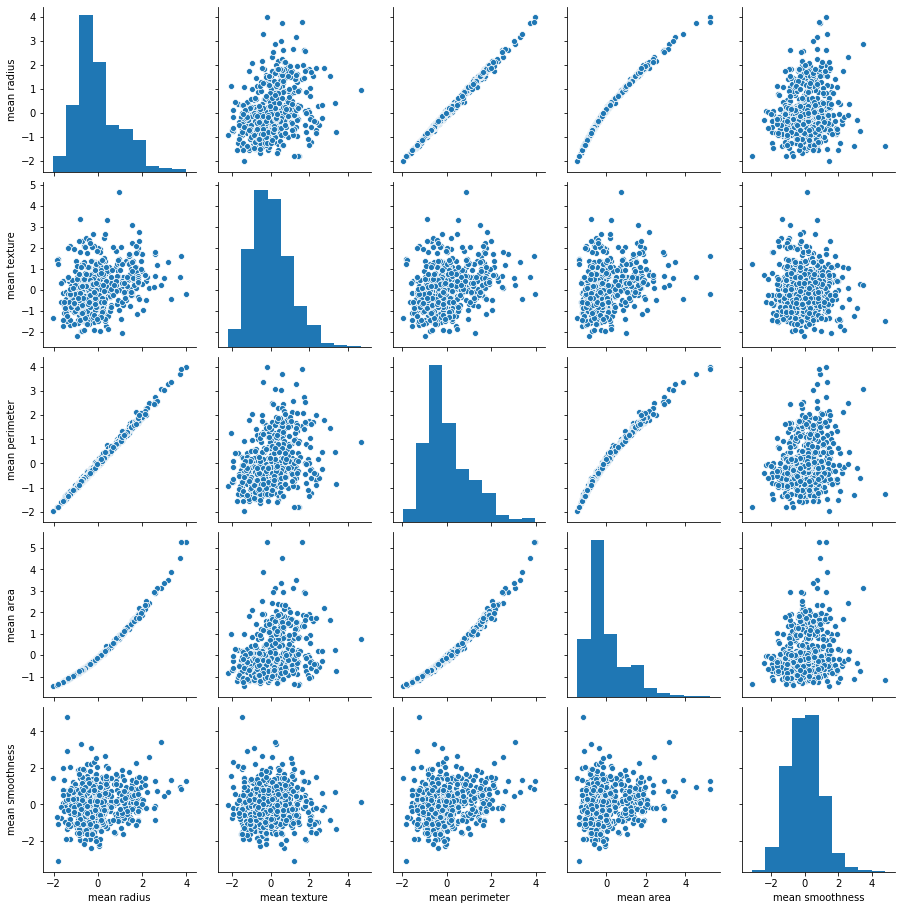

In [51]:
sns.pairplot(X_sca.iloc[:, 0:5])

## 4. train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sca, y, train_size = .8, random_state = 101)

## 5. modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [30]:
algo = [
    [KNeighborsClassifier(n_neighbors=10), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GaussianNB(), 'GaussianNB'],
    [SVC(), 'SupportVectorMachine'], 
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier']
]
model_score=[]
for a in algo:
    model=a[0]
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    score=model.score(X_test, y_test)
    model_score.append([score, a[1]])
    print(f'{a[1]} score = {score}') 
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)
print(model_score)

KNeighborsClassifier score = 0.9824561403508771
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

----------------------------------------------------------------------------------------------------
LogisticRegression score = 0.9912280701754386
[[41  1]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

----------------------------------------------------------------------------------------------------
GaussianNB s

## 6. predicting

In [31]:
pd.DataFrame(model_score, columns=['score', 'model']).sort_values(by='score', ascending=False)

,score,model
1,0.991228,LogisticRegression
0,0.982456,KNeighborsClassifier
3,0.982456,SupportVectorMachine
4,0.973684,GradientBoostingClassifier
6,0.973684,AdaBoostClassifier
5,0.964912,RandomForestClassifier
2,0.938596,GaussianNB


In [32]:
import statsmodels.api as sm

In [40]:
model_best = sm.Logit(y, X_sca).fit()

Optimization terminated successfully.
         Current function value: 0.023921
         Iterations 19


In [41]:
model_best.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                  Logit               Pseudo R-squared:    0.964      
Dependent Variable:     cancer              AIC:                 87.2221    
Date:                   2020-03-02 23:20    BIC:                 217.5385   
No. Observations:       569                 Log-Likelihood:      -13.611    
Df Model:               29                  LL-Null:             -375.72    
Df Residuals:           539                 LLR p-value:         8.6176e-134
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         19.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
----------------------------------------------------------------------------
mean radius              287.0824 202.6087  1.4169 0.1565 -110.0234 684.1881
mean texture              -1.9736   3.6147 -0.5460 0.5851   -9.0583   5.1111
mean perimeter          -155.1279 128.1484 -1.2105 0.2261 -406.2942  96.0384
mean area               -124.2255 103.6690 -1.1983 0.2308 -327.4130  78.9619
mean smoothness          -17.7572  11.7794 -1.5075 0.1317  -40.8443   5.3299
mean compactness          47.5162  34.9459  1.3597 0.1739  -20.9766 116.0089
mean concavity           -13.5187  18.6680 -0.7242 0.4690  -50.1073  23.0699
mean concave points      -15.7509  16.3084 -0.9658 0.3341  -47.7147  16.2129
mean symmetry              7.0581   5.2858  1.3353 0.1818   -3.3020  17.4181
mean fractal dimension    -3.6390   7.7308 -0.4707 0.6378  -18.7911  11.5131
radius error              -7.5926  35.7278 -0.2125 0.8317  -77.6177  62.4326
texture error              4.6785   4.6374  1.0089 0.3130   -4.4106  13.7676
perimeter error           27.3367  22.9867  1.1892 0.2343  -17.7165  72.3898
area error               -72.9286  72.7887 -1.0019 0.3164 -215.5919  69.7346
smoothness error          -2.0383   3.0429 -0.6699 0.5030   -8.0022   3.9256
compactness error        -28.8732  19.2535 -1.4996 0.1337  -66.6093   8.8630
concavity error           25.5843  17.5528  1.4576 0.1450   -8.8185  59.9871
concave points error     -27.8933  18.8928 -1.4764 0.1398  -64.9225   9.1358
symmetry error             9.8888   7.4311  1.3307 0.1833   -4.6759  24.4536
fractal dimension error   47.2098  32.6963  1.4439 0.1488  -16.8738 111.2934
worst radius            -139.3815 123.2727 -1.1307 0.2582 -380.9915 102.2286
worst texture            -12.7728   8.2133 -1.5551 0.1199  -28.8705   3.3249
worst perimeter          -34.3664  43.4392 -0.7911 0.4289 -119.5056  50.7728
worst area               146.7785 131.8767  1.1130 0.2657 -111.6951 405.2521
worst smoothness          10.9287  10.3654  1.0543 0.2917   -9.3872  31.2445
worst compactness         20.7866  15.2746  1.3609 0.1736   -9.1511  50.7243
worst concavity          -28.5819  19.8617 -1.4390 0.1501  -67.5102  10.3463
worst concave points       5.7206   6.4741  0.8836 0.3769   -6.9684  18.4097
worst symmetry           -15.6530  11.3298 -1.3816 0.1671  -37.8590   6.5529
worst fractal dimension  -28.1211  19.6431 -1.4316 0.1523  -66.6208  10.3786
============================================================================

"""